In [73]:
import os
os.chdir('/home/sarthak/Music/dagdu')
print(os.getcwd())


/home/sarthak/Music/dagdu


In [74]:
#Importing libraries
import warnings
import numpy as np
import pandas as pd
import sqlite3 as sql
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from matplotlib.backends.backend_pdf import PdfPages
import random
from sklearn.preprocessing import Imputer
random.seed(100)

In [75]:
# Load the data of 2007-2011
data=pd.read_csv('loan.csv',low_memory=False)
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(100)


In [76]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.shape

(42535, 144)

In [78]:
#Checking null values in the column
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

id                                            100.000000
member_id                                     100.000000
loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       6.173739
emp_length                                      2.614318
home_ownership                                  0.000000
annual_inc                                      0.009404
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                     

In [79]:
data['tax_liens'].nunique()

2

In [80]:
#Data Preprocessing Steps

In [81]:
#Deleting columns that have 100 percent null values
cols_to_delete = data.columns[data.isnull().sum()/len(data) == 1.0]
data.drop(cols_to_delete,axis = 1,inplace=True)

In [82]:
print(cols_to_delete)

Index(['id', 'member_id', 'url', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_o

In [83]:
data.shape

(42535, 62)

In [84]:
#Checking null values in the column
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.173739
emp_length                     2.614318
home_ownership                 0.000000
annual_inc                     0.009404
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
desc                          31.251910
purpose                        0.000000
title                          0.030563
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.068179
earliest_cr_line               0.068179
inq_last_6mths                 0.068179


In [85]:
cols_to_delete1 = data.columns[data.isnull().sum()/len(data) > 0.90]

In [86]:
cols_to_delete1

Index(['mths_since_last_record', 'next_pymnt_d', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object')

In [87]:
data.drop(cols_to_delete1,axis = 1,inplace=True)
data.shape

(42535, 54)

In [88]:
#we remove features that have a single unique value. 
#A feature associated with one unique value does not help the model to generalize well since it’s variance is zero
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features


In [89]:
const_features = find_constant_features(data)
print(const_features)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'hardship_flag']


In [90]:
data.drop(const_features,axis = 1,inplace=True)

In [91]:
data.shape

(42535, 47)

In [92]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'debt_settlement_flag'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 47 columns):
loan_amnt                     42535 non-null int64
funded_amnt                   42535 non-null int64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
desc                          29242 non-null object
purpose                       42535 non-null object
title 

In [94]:
#Few more columns to be dropped after checking unique values in them
#1.emp_title:-The job title supplied by the Borrower when applying for the loan.
#2.zip_code:The first 3 numbers of the zip code provided by the borrower in the loan application.
#3.desc:-Loan description provided by the borrower
#4.earliest_cr_line:The month the borrower's earliest reported credit line was opened.
data['earliest_cr_line'].nunique()


530

In [95]:
cols=['emp_title','zip_code','desc','earliest_cr_line','last_pymnt_d','last_credit_pull_d','issue_d']
data.drop(cols,axis=1,inplace=True)

In [96]:
data.shape

(42535, 40)

In [97]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.0,0.00,171.62,0.0,0.0,0.0,0.0,0.0,0.0,N
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,122.9,1.11,119.66,0.0,0.0,0.0,0.0,0.0,0.0,N
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.0,0.00,649.91,0.0,0.0,0.0,0.0,0.0,0.0,N
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.0,0.00,357.48,0.0,0.0,0.0,0.0,0.0,0.0,N
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0.0,0.00,67.30,0.0,0.0,0.0,0.0,0.0,0.0,N


In [98]:
#Tried to find out columns only having zero values 
zero_cols = [ col for col, is_zero in ((data == 0).sum() == data.shape[0]).items() if is_zero ]


In [99]:
zero_cols

[]

In [100]:
#Columns having null values out of 44 columns
data.columns[data.isna().any()].tolist()

['emp_length',
 'annual_inc',
 'title',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [101]:
data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
purpose                           0
title                            13
addr_state                        0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
mths_since_last_delinq        26926
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                       90
total_acc                        29
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp             

In [102]:
#data['revol_util'].to_frame

In [103]:
#Removing % 
#def p2f(x):
    #return float(x.strip('%'))/100

In [104]:
#p2f(data['revol_util'])

In [105]:
#Formatting emp_length column
data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
data['emp_length'].replace('< 1 year', '0 years', inplace=True)
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
data['emp_length'] = data['emp_length'].apply(emp_length_to_int)
data['emp_length'].value_counts(dropna=False).sort_index()


0.0     5062
1.0     3595
2.0     4743
3.0     4364
4.0     3649
5.0     3458
6.0     2375
7.0     1875
8.0     1592
9.0     1341
10.0    9369
NaN     1112
Name: emp_length, dtype: int64

In [106]:
#Imputation of values by some buisness sense
#1.delinq_2yrs:-late or overdue for the payment from last 2 years. 
#Only 29 missing observations,so replacing those with zero, giving lendors the benefit of the doubt.
data['delinq_2yrs'] = data['delinq_2yrs'].fillna(0)
#2.emp_length:-Employment length in years,Replacing nan with median as histogram shows outlier
data['emp_length'] = data['emp_length'].fillna((data['emp_length'].median()))
#3.annual_inc:-The self-reported annual income provided by the borrower during registration.
# Only 4missing values,so imputing with mean 
data['annual_inc'] = data['annual_inc'].fillna((data['annual_inc'].mean()))
#4.title:-For title, i will impute 'title not given' since there are only 13 missing.
data['title'] = np.where(data['title'].isnull(),"No Title", data['title'])
#5.inq_last_6mths:-The borrower's number of inquiries by creditors in the last 6 months.29 nan,Replacing with 0
data['inq_last_6mths'] = data['inq_last_6mths'].fillna(0)
#6.mths_since_last_delinq:-Months late or overdue for the payment,maximum null values
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna((data['mths_since_last_delinq'].mean()))
#7.open_acc:-The number of open credit lines in the borrower's credit file.
data['open_acc']= np.where(data['open_acc'].isnull(), 0, data['open_acc'])
#8.pub_rec:-Number of derogatory public records.29 missing
data['pub_rec'] = np.where(data['pub_rec'].isnull(), 0, data['pub_rec'])
#9.total_acc missing values will be replaced with 0. 29 missing values
data['total_acc'] = np.where(data['total_acc'].isnull(), 0,data['total_acc'])
#10.collections_12_mths_ex_med:-Number of collections in 12 months excluding medical collections,145 missing values
data['collections_12_mths_ex_med'] = np.where(data['collections_12_mths_ex_med'].isnull(), 0, data['collections_12_mths_ex_med'])
#11.acc_now_delinq:-any account past due is a delinquent account,29 missing values
data['acc_now_delinq'] = np.where(data['acc_now_delinq'].isnull(), 0, data['acc_now_delinq'])
#12.chargeoff_within_12_mths:loans charged off in last 12 months
data['chargeoff_within_12_mths'] = np.where(data['chargeoff_within_12_mths'].isnull(), 0, data['chargeoff_within_12_mths'])
#13.delinq_amnt -29 missing
data['delinq_amnt'] = np.where(data['delinq_amnt'].isnull(), 0, data['delinq_amnt'])
#14.tax_liens:-A tax lien is a lien imposed by law upon a property to secure the payment of taxes
data['tax_liens'] = data['tax_liens'].fillna((data['tax_liens'].mean()))
#15.revol_util
data['revol_util']=data.revol_util.replace(np.nan,0)
#16.pub_rec_bankruptcies          
data['pub_rec_bankruptcies']=data.pub_rec_bankruptcies.replace(np.nan,0)


In [107]:
data['delinq_amnt'].unique()

array([   0.,   27., 6053.])

In [108]:
data["tax_liens"].describe()

count    42535.000000
mean         0.000024
std          0.004849
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: tax_liens, dtype: float64

In [109]:
data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [110]:
data.shape

(42535, 40)

In [111]:
data['dti'].unique()

array([27.65,  1.  ,  8.72, ..., 28.16, 29.41, 28.43])

In [112]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10.0,RENT,...,0.0,0.00,171.62,0.0,0.0,0.0,0.0,0.0,0.0,N
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0.0,RENT,...,122.9,1.11,119.66,0.0,0.0,0.0,0.0,0.0,0.0,N
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10.0,RENT,...,0.0,0.00,649.91,0.0,0.0,0.0,0.0,0.0,0.0,N
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10.0,RENT,...,0.0,0.00,357.48,0.0,0.0,0.0,0.0,0.0,0.0,N
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1.0,RENT,...,0.0,0.00,67.30,0.0,0.0,0.0,0.0,0.0,0.0,N


In [113]:
#Removing % and formatting some columns
data['term'] = data['term'].apply(lambda s: np.int8(s.split()[0]))
data['int_rate'] = data['int_rate'].str.replace('%', '')
#data["int_rate"]=data["int_rate"].astype("float")
data['revol_util'] = data['revol_util'].str.replace('%', '')


In [114]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,...,0.0,0.00,171.62,0.0,0.0,0.0,0.0,0.0,0.0,N
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,...,122.9,1.11,119.66,0.0,0.0,0.0,0.0,0.0,0.0,N
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,...,0.0,0.00,649.91,0.0,0.0,0.0,0.0,0.0,0.0,N
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,...,0.0,0.00,357.48,0.0,0.0,0.0,0.0,0.0,0.0,N
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,...,0.0,0.00,67.30,0.0,0.0,0.0,0.0,0.0,0.0,N


In [115]:
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [116]:
#Making loan status reduced to 2 columns after merging 
data["loan_status"]=data["loan_status"].str.rsplit(":").str[-1]
data['loan_status'].unique()



array(['Fully Paid', 'Charged Off'], dtype=object)

In [117]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'debt_settlement_flag'],
      dtype='object')

In [118]:
#Converting target column to 1,0
data['loan_status'] = data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [119]:
data['loan_status'].unique()

array([1, 0])

In [120]:
#Performing chisquare test to test significant categorical columns with respect to target column
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = data

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['grade','sub_grade','home_ownership','verification_status','purpose','title','addr_state','debt_settlement_flag']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="loan_status" )  

grade is IMPORTANT for Prediction
sub_grade is IMPORTANT for Prediction
home_ownership is IMPORTANT for Prediction
verification_status is IMPORTANT for Prediction
purpose is IMPORTANT for Prediction
title is NOT an important predictor. (Discard title from model)
addr_state is IMPORTANT for Prediction
debt_settlement_flag is IMPORTANT for Prediction


In [121]:
#pd.crosstab(data['debt_settlement_flag'],data['loan_status'])

In [122]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [123]:
#Dropping title from data
cols_delete=['title','chargeoff_within_12_mths','collections_12_mths_ex_med']
data=data.drop(cols_delete,axis=1)

In [124]:
data=data.dropna()

In [125]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag'],
      dtype='object')

In [126]:
data.shape

(42445, 37)

In [127]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,...,863.16,0.00,0.0,0.00,171.62,0.0,0.0,0.0,0.0,N
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,...,435.17,0.00,122.9,1.11,119.66,0.0,0.0,0.0,0.0,N
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,...,605.67,0.00,0.0,0.00,649.91,0.0,0.0,0.0,0.0,N
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,...,2214.92,16.97,0.0,0.00,357.48,0.0,0.0,0.0,0.0,N
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,...,1066.91,0.00,0.0,0.00,67.30,0.0,0.0,0.0,0.0,N


In [128]:
#Label encoding categories
from sklearn import preprocessing
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
# Column is string and we want discre integer values
data['grade'] = label_encoder.fit_transform(data['grade'])
data['sub_grade'] = label_encoder.fit_transform(data['sub_grade'])
data['home_ownership'] = label_encoder.fit_transform(data['home_ownership'])
data['verification_status'] = label_encoder.fit_transform(data['verification_status'])
data['home_ownership'] = label_encoder.fit_transform(data['home_ownership'])
data['verification_status'] = label_encoder.fit_transform(data['verification_status'])
data['purpose'] = label_encoder.fit_transform(data['purpose'])
data['addr_state'] = label_encoder.fit_transform(data['addr_state'])
data['debt_settlement_flag'] = label_encoder.fit_transform(data['debt_settlement_flag'])




In [129]:
data.shape

(42445, 37)

In [130]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000,5000,4975.0,36,10.65,162.87,1,6,10.0,4,...,863.16,0.00,0.0,0.00,171.62,0.0,0.0,0.0,0.0,0
1,2500,2500,2500.0,60,15.27,59.83,2,13,0.0,4,...,435.17,0.00,122.9,1.11,119.66,0.0,0.0,0.0,0.0,0
2,2400,2400,2400.0,36,15.96,84.33,2,14,10.0,4,...,605.67,0.00,0.0,0.00,649.91,0.0,0.0,0.0,0.0,0
3,10000,10000,10000.0,36,13.49,339.31,2,10,10.0,4,...,2214.92,16.97,0.0,0.00,357.48,0.0,0.0,0.0,0.0,0
4,3000,3000,3000.0,60,12.69,67.79,1,9,1.0,4,...,1066.91,0.00,0.0,0.00,67.30,0.0,0.0,0.0,0.0,0


In [131]:
data.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag'],
      dtype='object')

In [132]:
#Creating a random model
#Train Test split
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = data.drop(['loan_status'],axis=1)
# Putting response variable to y
y = data['loan_status']

In [133]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (29711, 36)
Number transactions y_train dataset:  (29711,)
Number transactions X_test dataset:  (12734, 36)
Number transactions y_test dataset:  (12734,)


In [134]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 25291
Before OverSampling, counts of label '0': 4420 

After OverSampling, the shape of train_X: (50582, 36)
After OverSampling, the shape of train_y: (50582,) 

After OverSampling, counts of label '1': 25291
After OverSampling, counts of label '0': 25291


In [135]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [136]:
# fit
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
# Making predictions
predictions = rfc.predict(X_test)

In [138]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(accuracy_score(y_test,predictions))

0.9992147008010052


In [139]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1989
           1       1.00      1.00      1.00     10745

    accuracy                           1.00     12734
   macro avg       1.00      1.00      1.00     12734
weighted avg       1.00      1.00      1.00     12734



In [140]:
pd.crosstab(y_test,predictions)

col_0,0,1
loan_status,,
0,1979,10
1,0,10745


In [141]:
# Create a list of feature names
feat_labels = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag']


In [142]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)


('loan_amnt', 0.014375919406526941)
('funded_amnt', 0.017740303561131494)
('funded_amnt_inv', 0.004026004734216235)
('term', 0.014150795784205755)
('int_rate', 0.0026093434525247625)
('installment', 0.009565420291957175)
('grade', 0.01904803564846636)
('sub_grade', 0.0025398953651053677)
('emp_length', 0.0003447660858111628)
('home_ownership', 0.0014667984209691186)
('annual_inc', 0.00026644369633820964)
('verification_status', 0.004854587210349098)
('loan_status', 0.0021925922450656884)
('purpose', 0.00020277913569982366)
('addr_state', 0.0002710025044444384)
('dti', 0.0001269344014859982)
('delinq_2yrs', 0.03344852690901739)
('inq_last_6mths', 0.0002659428126972203)
('mths_since_last_delinq', 0.00024154361692856367)
('open_acc', 0.001119061272027208)
('pub_rec', 0.0004928877296152333)
('revol_bal', 0.00022957356156884539)
('revol_util', 0.0008187880202217381)
('total_acc', 0.06577045931839434)
('total_pymnt', 0.012741374983968786)
('total_pymnt_inv', 0.0653810686702161)
('total_rec_p

In [143]:
def filter_df_corr(inp_data, corr_val):
    '''
    Returns an array or dataframe (based on type(inp_data) adjusted to drop \
        columns with high correlation to one another. Takes second arg corr_val
        that defines the cutoff

    ----------
    inp_data : np.array, pd.DataFrame
        Values to consider
    corr_val : float
        Value [0, 1] on which to base the correlation cutoff
    '''
    # Creates Correlation Matrix
    if isinstance(inp_data, np.ndarray):
        inp_data = pd.DataFrame(data=inp_data)
        array_flag = True
    else:
        array_flag = False
    corr_matrix = inp_data.corr()

    # Iterates through Correlation Matrix Table to find correlated columns
    drop_cols = []
    n_cols = len(corr_matrix.columns)

    for i in range(n_cols):
        for k in range(i+1, n_cols):
            val = corr_matrix.iloc[k, i]
            col = corr_matrix.columns[i]
            row = corr_matrix.index[k]
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                # Prints the correlated feature set and the corr val
                print(col, "|", row, "|", round(val, 2))
                drop_cols.append(col)
                #print(drop_cols)

    # Drops the correlated columns
    drop_cols = set(drop_cols)
    inp_data = inp_data.drop(columns=drop_cols)
    # Return same type as inp
    if array_flag:
        return inp_data.values
    else:
        return inp_data


In [144]:
data1=filter_df_corr(data,0.80)

loan_amnt | funded_amnt | 0.98
loan_amnt | funded_amnt_inv | 0.93
loan_amnt | installment | 0.93
loan_amnt | total_pymnt | 0.88
loan_amnt | total_pymnt_inv | 0.84
loan_amnt | total_rec_prncp | 0.85
funded_amnt | funded_amnt_inv | 0.95
funded_amnt | installment | 0.96
funded_amnt | total_pymnt | 0.9
funded_amnt | total_pymnt_inv | 0.86
funded_amnt | total_rec_prncp | 0.87
funded_amnt_inv | installment | 0.89
funded_amnt_inv | total_pymnt | 0.87
funded_amnt_inv | total_pymnt_inv | 0.91
funded_amnt_inv | total_rec_prncp | 0.84
installment | total_pymnt | 0.85
installment | total_rec_prncp | 0.84
grade | sub_grade | 0.98
pub_rec | pub_rec_bankruptcies | 0.82
total_pymnt | total_pymnt_inv | 0.97
total_pymnt | total_rec_prncp | 0.97
total_pymnt | total_rec_int | 0.84
total_pymnt_inv | total_rec_prncp | 0.94
total_pymnt_inv | total_rec_int | 0.82
recoveries | collection_recovery_fee | 0.82


In [145]:
data1.shape

(42445, 28)

In [146]:
data1.head()

,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,...,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,36,10.65,6,10.0,4,24000.0,2,1,1,3,...,5000.00,863.16,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0
1,60,15.27,13,0.0,4,30000.0,1,0,0,10,...,456.46,435.17,0.00,1.11,119.66,0.0,0.0,0.0,0.0,0
2,36,15.96,14,10.0,4,12252.0,0,1,11,14,...,2400.00,605.67,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0
3,36,13.49,10,10.0,4,49200.0,1,1,9,4,...,10000.00,2214.92,16.97,0.00,357.48,0.0,0.0,0.0,0.0,0
4,60,12.69,9,1.0,4,80000.0,1,1,9,36,...,3000.00,1066.91,0.00,0.00,67.30,0.0,0.0,0.0,0.0,0


In [147]:
data1['loan_status'].value_counts()

1    36036
0     6409
Name: loan_status, dtype: int64

In [148]:
#mask = data1["loan_status"] == 0
#mask1=data1["loan_status"] == 1
#z=data1[mask & mask1]
#plt.scatter(z)

In [149]:
#Creating a random model
#Train Test split
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = data1.drop(['loan_status'],axis=1)
# Putting response variable to y
y = data1['loan_status']

In [150]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (29711, 27)
Number transactions y_train dataset:  (29711,)
Number transactions X_test dataset:  (12734, 27)
Number transactions y_test dataset:  (12734,)


In [151]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 25291
Before OverSampling, counts of label '0': 4420 

After OverSampling, the shape of train_X: (50582, 27)
After OverSampling, the shape of train_y: (50582,) 

After OverSampling, counts of label '1': 25291
After OverSampling, counts of label '0': 25291


In [152]:
X_train=pd.DataFrame(X_train_res,columns = data1.drop(['loan_status'],axis=1).columns)
X_train.head()


,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,36.0,12.69,9.0,7.0,0.0,130000.0,1.0,2.0,27.0,10.64,...,13000.00,2573.81,0.0,0.0,3380.95,0.0,0.0,0.0,0.0,0.0
1,36.0,10.99,7.0,1.0,4.0,60000.0,2.0,2.0,6.0,11.56,...,12000.00,942.63,0.0,0.0,775.12,0.0,0.0,0.0,0.0,0.0
2,36.0,18.62,26.0,4.0,3.0,35000.0,1.0,2.0,9.0,4.46,...,2004.67,1273.85,0.0,0.0,364.65,0.0,0.0,0.0,0.0,0.0
3,36.0,7.90,3.0,5.0,0.0,120000.0,2.0,11.0,41.0,16.67,...,28000.00,1634.80,0.0,0.0,21753.99,0.0,0.0,0.0,0.0,0.0
4,36.0,13.11,11.0,0.0,4.0,42000.0,2.0,9.0,5.0,1.31,...,1018.50,462.90,0.0,0.0,371.20,0.0,0.0,0.0,0.0,0.0


In [153]:
'''from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train_res,y_train_res)'''

'from sklearn.linear_model import LogisticRegression\nfrom sklearn import metrics\nlogsk = LogisticRegression()\nlogsk.fit(X_train_res,y_train_res)'

In [154]:
#pred1=logsk.predict(X_test)

In [155]:
# Printing confusion matrix
#from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
#print(confusion_matrix(y_test,pred1))

In [156]:
#print(classification_report(y_test,pred1))

In [157]:
#print("accuracy:", metrics.accuracy_score(y_test,pred1))


In [158]:
# Importing random forest classifier from sklearn library
#from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
#rfc = RandomForestClassifier()

In [159]:
# fit
#rfc.fit(X_train_res,y_train_res)

In [160]:
#Making predictions
#predictions = rfc.predict(X_test)

In [161]:
# Printing confusion matrix
#from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
#print(confusion_matrix(y_test,predictions))

In [162]:
#print(classification_report(y_test,predictions))

In [163]:
#print("accuracy:", metrics.accuracy_score(y_test,predictions))


In [164]:
# create a KFold object with 5 splits
'''from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rfc, X_train_res, y_train_res, scoring='f1', cv=folds)
scores'''  

"from sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import KFold\nfolds = KFold(n_splits = 5, shuffle = True, random_state = 100)\nscores = cross_val_score(rfc, X_train_res, y_train_res, scoring='f1', cv=folds)\nscores"

In [165]:
#Creating a random model
#Train Test split
'''from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = data1.drop(['loan_status'],axis=1)
# Putting response variable to y
y = data1['loan_status']'''

"from sklearn.model_selection import train_test_split\n# Putting feature variable to X\nX = data1.drop(['loan_status'],axis=1)\n# Putting response variable to y\ny = data1['loan_status']"

In [166]:
# Splitting the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [167]:
# Let's run the model using the selected variables
'''from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train,y_train)'''

'from sklearn.linear_model import LogisticRegression\nfrom sklearn import metrics\nlogsk = LogisticRegression()\nlogsk.fit(X_train,y_train)'

In [168]:
#y_pred=logsk.predict(X_test)

In [169]:
# confusion matrix and accuracy

#accuracy
#print("accuracy:", metrics.accuracy_score(y_test,y_pred))

# cm
#print(metrics.confusion_matrix(y_test,y_pred))

In [170]:
#pd.crosstab(y_test,y_pred)

In [171]:
#Creating a first statsmodel 
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train_res,(sm.add_constant(X_train)), family = sm.families.Binomial(),random_state=100)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                50582
Model:                            GLM   Df Residuals:                    50555
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 24 Jul 2019   Deviance:                          nan
Time:                        14:12:54   Pearson chi2:                 3.31e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.1059      0.263     -8.022      0.000      -2.620      -1.591
term                        0.0231      0.004      6.445      0.000       0.016       0.030
int_rate                    0.0449      0.025      1.818      0.069      -0.004       0.093
sub_grade                   0.0026      0.012      0.222      0.824      -0.021       0.026
emp_length                 -0.0364      0.008     -4.377      0.000      -0.053      -0.020
home_ownership              0.0452      0.016      2.785      0.005       0.013       0.077
annual_inc               9.072e-07   8.07e-07      1.124      0.261   -6.74e-07    2.49e-06
verification_status        -0.2432      0.036     -6.678      0.000      -0.315      -0.172
purpose                     0.0650      0.008      8.106      0.000       0.049       0.081
addr_state                  0.0070      0.002      3.620      0.000       0.003       0.011
dti                        -0.0143      0.005     -3.034      0.002      -0.024      -0.005
delinq_2yrs                 0.2292      0.057      4.041      0.000       0.118       0.340
inq_last_6mths             -0.1429      0.017     -8.478      0.000      -0.176      -0.110
mths_since_last_delinq      0.0065      0.002      2.961      0.003       0.002       0.011
open_acc                    0.0341      0.009      3.879      0.000       0.017       0.051
revol_bal               -1.805e-05   1.64e-06    -11.022      0.000   -2.13e-05   -1.48e-05
revol_util                 -0.0011      0.001     -0.919      0.358      -0.003       0.001
total_acc                  -0.0473      0.004    -12.783      0.000      -0.055      -0.040
total_rec_prncp             0.0011   2.25e-05     49.953      0.000       0.001       0.001
total_rec_int              -0.0018   4.27e-05    -41.098      0.000      -0.002      -0.002
total_rec_late_fee         -0.0232      0.004     -6.443      0.000      -0.030      -0.016
collection_recovery_fee -1.464e+04   1250.586    -11.706      0.000   -1.71e+04   -1.22e+04
last_pymnt_amnt             0.0009   6.47e-05     14.487      0.000       0.001       0.001
acc_now_delinq             35.9238   6.71e+07   5.35e-07      1.000   -1.32e+08    1.32e+08
delinq_amnt                -0.0008   1.57e+04  -5.36e-08      1.000   -3.07e+04    3.07e+04
pub_rec_bankruptcies       -0.4177      0.111     -3.772      0.000      -0.635      -0.201
tax_liens                 1.01e+05   3.24e+04      3.117      0.002    3.75e+04    1.65e+05
debt_settlement_flag     -774.0405   1.31e+05     -0.006      0.995   -2.58e+05    2.56e+05
===========================================================================================
"""

In [172]:
# Calculating Vif value|
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]].astype(float) 
        x=x_vars[xvar_names.drop(xvar_names[i])].astype(float)
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [173]:
vif_cal(data1,'loan_status')

,Var,Vif
1,int_rate,92.81
2,sub_grade,25.43
0,term,23.58
13,open_acc,11.14
16,total_acc,10.68
17,total_rec_prncp,10.16
12,mths_since_last_delinq,9.67
15,revol_util,6.53
9,dti,6.47
18,total_rec_int,6.29


In [174]:
#Dropping columns having high vif and p value
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['int_rate','sub_grade'],1)

In [175]:
# Create a second fitted model
import statsmodels.api as sm
# Logistic regression model
logm2 = sm.GLM(y_train_res,(sm.add_constant(X_train)),family = sm.families.Binomial(),random_state=100)
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                50582
Model:                            GLM   Df Residuals:                    50557
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 24 Jul 2019   Deviance:                          nan
Time:                        14:13:06   Pearson chi2:                 3.33e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8001      0.217     -8.290      0.000      -2.226      -1.375
term                        0.0259      0.004      7.403      0.000       0.019       0.033
emp_length                 -0.0384      0.008     -4.620      0.000      -0.055      -0.022
home_ownership              0.0519      0.016      3.218      0.001       0.020       0.084
annual_inc               1.099e-06   8.12e-07      1.353      0.176   -4.93e-07    2.69e-06
verification_status        -0.2354      0.036     -6.500      0.000      -0.306      -0.164
purpose                     0.0655      0.008      8.179      0.000       0.050       0.081
addr_state                  0.0069      0.002      3.589      0.000       0.003       0.011
dti                        -0.0151      0.005     -3.208      0.001      -0.024      -0.006
delinq_2yrs                 0.2782      0.056      4.976      0.000       0.169       0.388
inq_last_6mths             -0.1223      0.016     -7.849      0.000      -0.153      -0.092
mths_since_last_delinq      0.0067      0.002      3.100      0.002       0.002       0.011
open_acc                    0.0398      0.009      4.590      0.000       0.023       0.057
revol_bal               -1.832e-05   1.64e-06    -11.155      0.000   -2.15e-05   -1.51e-05
revol_util                  0.0012      0.001      1.079      0.281      -0.001       0.003
total_acc                  -0.0505      0.004    -13.947      0.000      -0.058      -0.043
total_rec_prncp             0.0011   2.17e-05     50.646      0.000       0.001       0.001
total_rec_int              -0.0017   3.98e-05    -42.535      0.000      -0.002      -0.002
total_rec_late_fee         -0.0227      0.004     -6.377      0.000      -0.030      -0.016
collection_recovery_fee -1.475e+04   1250.539    -11.795      0.000   -1.72e+04   -1.23e+04
last_pymnt_amnt             0.0010   6.48e-05     14.760      0.000       0.001       0.001
acc_now_delinq             35.9600   6.71e+07   5.36e-07      1.000   -1.32e+08    1.32e+08
delinq_amnt                -0.0005   1.57e+04  -3.43e-08      1.000   -3.07e+04    3.07e+04
pub_rec_bankruptcies       -0.3853      0.110     -3.491      0.000      -0.602      -0.169
tax_liens                1.029e+05   3.22e+04      3.195      0.001    3.98e+04    1.66e+05
debt_settlement_flag     -770.7269   1.31e+05     -0.006      0.995   -2.57e+05    2.56e+05
===========================================================================================
"""

In [176]:
#Calculating Vif value
vif_cal(input_data=data1.drop(["int_rate","sub_grade"], axis=1),dependent_col="loan_status")

,Var,Vif
0,term,16.22
11,open_acc,10.77
14,total_acc,10.48
15,total_rec_prncp,8.98
10,mths_since_last_delinq,8.79
7,dti,6.44
16,total_rec_int,4.87
13,revol_util,4.81
1,emp_length,3.22
6,addr_state,3.09


In [177]:
#Dropping columns having high vif 
X_train = X_train.drop(['term','open_acc','total_acc'],1)

In [178]:
# Create a second fitted model
import statsmodels.api as sm
# Logistic regression model
logm3 = sm.GLM(y_train_res,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                50582
Model:                            GLM   Df Residuals:                    50560
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 24 Jul 2019   Deviance:                          nan
Time:                        14:13:16   Pearson chi2:                 1.13e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0615      0.146     -7.271      0.000      -1.348      -0.775
emp_length                 -0.0508      0.008     -6.255      0.000      -0.067      -0.035
home_ownership              0.0960      0.015      6.229      0.000       0.066       0.126
annual_inc              -1.297e-06   6.27e-07     -2.068      0.039   -2.53e-06   -6.76e-08
verification_status        -0.2096      0.035     -5.916      0.000      -0.279      -0.140
purpose                     0.0659      0.008      8.440      0.000       0.051       0.081
addr_state                  0.0062      0.002      3.299      0.001       0.003       0.010
dti                        -0.0288      0.004     -6.706      0.000      -0.037      -0.020
delinq_2yrs                 0.1678      0.054      3.133      0.002       0.063       0.273
inq_last_6mths             -0.1357      0.015     -8.789      0.000      -0.166      -0.105
mths_since_last_delinq      0.0056      0.002      2.620      0.009       0.001       0.010
revol_bal               -2.194e-05   1.57e-06    -13.949      0.000    -2.5e-05   -1.89e-05
revol_util                  0.0024      0.001      2.314      0.021       0.000       0.004
total_rec_prncp             0.0010   1.98e-05     52.612      0.000       0.001       0.001
total_rec_int              -0.0015   3.34e-05    -46.087      0.000      -0.002      -0.001
total_rec_late_fee         -0.0220      0.004     -6.288      0.000      -0.029      -0.015
collection_recovery_fee -1.493e+04   1250.589    -11.936      0.000   -1.74e+04   -1.25e+04
last_pymnt_amnt             0.0009   6.12e-05     14.837      0.000       0.001       0.001
acc_now_delinq             35.8177   6.71e+07   5.34e-07      1.000   -1.32e+08    1.32e+08
delinq_amnt                -0.0007   1.57e+04  -4.73e-08      1.000   -3.07e+04    3.07e+04
pub_rec_bankruptcies       -0.3808      0.109     -3.482      0.000      -0.595      -0.166
tax_liens                1.015e+05   3.35e+04      3.033      0.002    3.59e+04    1.67e+05
debt_settlement_flag     -773.7314   1.31e+05     -0.006      0.995   -2.57e+05    2.56e+05
===========================================================================================
"""

In [179]:
# Calculating Vif value
vif_cal(input_data=data1.drop(["int_rate","sub_grade","term","open_acc","total_acc"], axis=1), dependent_col="loan_status")

,Var,Vif
12,total_rec_prncp,8.58
9,mths_since_last_delinq,6.99
6,dti,5.22
11,revol_util,4.62
13,total_rec_int,4.12
0,emp_length,3.03
5,addr_state,2.95
2,annual_inc,2.53
3,verification_status,2.40
1,home_ownership,2.28


In [180]:
#Dropping features having p values above 0.05
X_train = X_train.drop(["acc_now_delinq","delinq_amnt","debt_settlement_flag"],1)

In [181]:
# Create a second fitted model
import statsmodels.api as sm
# Logistic regression model
logm4 = sm.GLM(y_train_res,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                50582
Model:                            GLM   Df Residuals:                    50563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 24 Jul 2019   Deviance:                          nan
Time:                        14:13:25   Pearson chi2:                 7.54e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8064      0.139     -5.821      0.000      -1.078      -0.535
emp_length                 -0.0472      0.008     -6.147      0.000      -0.062      -0.032
home_ownership              0.0944      0.015      6.478      0.000       0.066       0.123
annual_inc              -6.348e-07   6.63e-07     -0.958      0.338   -1.93e-06    6.65e-07
verification_status        -0.2117      0.033     -6.331      0.000      -0.277      -0.146
purpose                     0.0548      0.007      7.420      0.000       0.040       0.069
addr_state                  0.0053      0.002      2.947      0.003       0.002       0.009
dti                        -0.0278      0.004     -6.845      0.000      -0.036      -0.020
delinq_2yrs                 0.1709      0.051      3.335      0.001       0.070       0.271
inq_last_6mths             -0.1319      0.015     -8.955      0.000      -0.161      -0.103
mths_since_last_delinq      0.0054      0.002      2.661      0.008       0.001       0.009
revol_bal               -2.052e-05   1.49e-06    -13.797      0.000   -2.34e-05   -1.76e-05
revol_util                  0.0025      0.001      2.616      0.009       0.001       0.004
total_rec_prncp             0.0010   1.81e-05     53.913      0.000       0.001       0.001
total_rec_int              -0.0014   3.03e-05    -47.719      0.000      -0.002      -0.001
total_rec_late_fee         -0.0257      0.003     -7.964      0.000      -0.032      -0.019
collection_recovery_fee -1.438e+04   1250.728    -11.497      0.000   -1.68e+04   -1.19e+04
last_pymnt_amnt             0.0004   3.57e-05     10.000      0.000       0.000       0.000
pub_rec_bankruptcies       -0.3770      0.104     -3.638      0.000      -0.580      -0.174
tax_liens                9.335e+04   3.24e+04      2.883      0.004    2.99e+04    1.57e+05
===========================================================================================
"""

In [182]:
# Calculating Vif value
vif_cal(input_data=data1.drop(["int_rate","sub_grade","term","open_acc","total_acc","acc_now_delinq","delinq_amnt","debt_settlement_flag"], axis=1), dependent_col="loan_status")

,Var,Vif
12,total_rec_prncp,8.57
9,mths_since_last_delinq,6.97
6,dti,5.22
11,revol_util,4.62
13,total_rec_int,4.11
0,emp_length,3.03
5,addr_state,2.95
2,annual_inc,2.53
3,verification_status,2.40
1,home_ownership,2.28


In [183]:
#Dropping features having p values above 0.05
X_train = X_train.drop(["annual_inc"],1)

In [184]:
import statsmodels.api as sm
# Logistic regression model
logm5 = sm.GLM(y_train_res,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                50582
Model:                            GLM   Df Residuals:                    50563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 24 Jul 2019   Deviance:                          nan
Time:                        14:13:32   Pearson chi2:                 8.02e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8386      0.134     -6.242      0.000      -1.102      -0.575
emp_length                 -0.0478      0.008     -6.247      0.000      -0.063      -0.033
home_ownership              0.0964      0.014      6.689      0.000       0.068       0.125
verification_status        -0.2135      0.033     -6.394      0.000      -0.279      -0.148
purpose                     0.0544      0.007      7.376      0.000       0.040       0.069
addr_state                  0.0053      0.002      2.955      0.003       0.002       0.009
dti                        -0.0271      0.004     -6.792      0.000      -0.035      -0.019
delinq_2yrs                 0.1684      0.051      3.293      0.001       0.068       0.269
inq_last_6mths             -0.1326      0.015     -9.015      0.000      -0.161      -0.104
mths_since_last_delinq      0.0054      0.002      2.668      0.008       0.001       0.009
revol_bal               -2.104e-05   1.39e-06    -15.173      0.000   -2.38e-05   -1.83e-05
revol_util                  0.0025      0.001      2.600      0.009       0.001       0.004
total_rec_prncp             0.0010   1.81e-05     53.953      0.000       0.001       0.001
total_rec_int              -0.0014   3.03e-05    -47.721      0.000      -0.002      -0.001
total_rec_late_fee         -0.0257      0.003     -7.952      0.000      -0.032      -0.019
collection_recovery_fee -1.447e+04   1250.696    -11.570      0.000   -1.69e+04    -1.2e+04
last_pymnt_amnt             0.0004   3.57e-05      9.983      0.000       0.000       0.000
pub_rec_bankruptcies       -0.3781      0.104     -3.650      0.000      -0.581      -0.175
tax_liens                9.366e+04   3.24e+04      2.888      0.004    3.01e+04    1.57e+05
===========================================================================================
"""

In [185]:
# Calculating Vif value
vif_cal(input_data=data1.drop(["annual_inc","int_rate","sub_grade","term","open_acc","total_acc","acc_now_delinq","delinq_amnt","debt_settlement_flag"], axis=1), dependent_col="loan_status")

,Var,Vif
11,total_rec_prncp,8.30
8,mths_since_last_delinq,6.82
5,dti,5.13
10,revol_util,4.60
12,total_rec_int,4.10
0,emp_length,3.00
4,addr_state,2.94
2,verification_status,2.40
1,home_ownership,2.28
3,purpose,2.17


In [186]:
#All the features have VIF below 10 and p values less than 0.05.Multicollinearity problem solved 

In [187]:
col=["total_rec_prncp","mths_since_last_delinq","dti","revol_util","total_rec_int","emp_length",
     "addr_state","verification_status","home_ownership","purpose","last_pymnt_amnt","revol_bal",
     "inq_last_6mths","delinq_2yrs","total_rec_late_fee","pub_rec_bankruptcies","collection_recovery_fee",
     "tax_liens"]

In [188]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic = LogisticRegression()
logistic.fit(X_train[col], y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
y_prediction = logistic.predict(X_test[col])


In [190]:
# confusion matrix and accuracy
# accuracy
print("accuracy:", metrics.accuracy_score(y_test,y_prediction))
# 
cm=metrics.confusion_matrix(y_test,y_prediction)
cm

accuracy: 0.9368619444008167


array([[ 1811,   178],
       [  626, 10119]])

In [191]:
pd.crosstab(y_test,y_prediction) #0 charged off, 1 is Fully paid

col_0,0,1
loan_status,,
0,1811,178
1,626,10119


In [192]:
#Create a KFold object with 5 splits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(logistic, X_train,y_train_res, scoring='accuracy', cv=folds)
scores  

array([0.95453198, 0.9586834 , 0.95156188, 0.9491894 , 0.94829972])

In [193]:
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1989
           1       0.98      0.94      0.96     10745

    accuracy                           0.94     12734
   macro avg       0.86      0.93      0.89     12734
weighted avg       0.95      0.94      0.94     12734



In [195]:
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
print(roc_auc_score(y_test, y_prediction))


0.9261240686034707


In [196]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

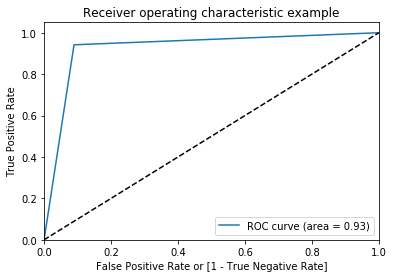

(array([0.        , 0.08949221, 1.        ]),
 array([0.        , 0.94174034, 1.        ]),
 array([2, 1, 0]))

In [197]:
draw_roc(y_test,y_prediction )

In [198]:
#Using PCA to get components having maximum variance
import numpy as np
from sklearn.decomposition import PCA

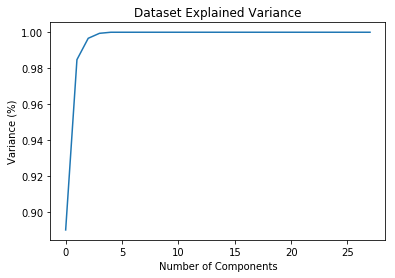

In [199]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [200]:
#Splitting data into train and test splits
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = data1.drop(['loan_status'],axis=1)

# Putting response variable to y
y = data1['loan_status']


In [201]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [202]:
dataset1=pca.fit_transform(X)

In [203]:
# Logistic regression model
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(class_weight='balanced')
logsk1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
y_pred = logsk1.predict(X_test)


In [205]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_test,y_pred))

# cm
print(metrics.confusion_matrix(y_test,y_pred))

accuracy: 0.9433799277524737
[[ 1816   137]
 [  584 10197]]


In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
y_pred = logsk1.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1953
           1       0.99      0.95      0.97     10781

    accuracy                           0.94     12734
   macro avg       0.87      0.94      0.90     12734
weighted avg       0.95      0.94      0.95     12734

